###  Step 0: Importing Libraries & Setting Pandas Options 

In [1]:
import numpy as np, pandas as pd, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime 
from datetime import date
import missingno as msno

In [2]:
#set option of displaying all columns in head method
pd.options.display.max_columns = None

#setting option of displaying floating variable in a specific format
pd.options.display.float_format = '{:,.2f}'.format

### <br>End-To-End Steps Involved<br>

#### <br> Step 1 - Data Ingestion & Inspection 
#### <br>Step 2 - Feature/Attribute Reduction
#### <br>Step 3 - Data Cleansing & Manipulation
#### <br>Step 3.a - Data Type Conversion & Value Correction 
#### <br>Step 3.b - Missing Value Analysis & Treatments
#### <br>Step 3.c - Outlier Analysis & Handlings
#### <br>Step 4 - Data Analytics
#### <br>Step 4.a - Univariate, Bivariate & Multivariate Analysis
#### <br>Step 4.b - Derived Metrics & Measures 
#### <br>Step 5 - Data Visuaizaion & Insights 
#### <br>Step 6 - Recommendations - Policy, Product, Practice, Process & Portfolio

### <br> Step 1: Importing & Inspecting Original 'loan' Dataset as 'obligor' Dataframe <br>

In [3]:
# Loading the source 'loan' dataset & creating a pandas dataframe with low memory option 
obligor = pd.read_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_6_Lending Club Case Study/loan.csv", low_memory=False)
obligor.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39714,90395,90390,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,"100,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,"5,272.16","1,397.12","5,000.00",272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,"200,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,"5,174.20",672.66,"5,000.00",174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [4]:
#Inspecting the olbigor dataframe shape & column info

print(obligor.shape)

(39717, 111)


## Checking metadata information about the dataset 60 variables at a time

In [5]:
obligor.iloc[:,:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

In [6]:
obligor.iloc[:,60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   open_il_6m                      0 non-null      float64
 1   open_il_12m                     0 non-null      float64
 2   open_il_24m                     0 non-null      float64
 3   mths_since_rcnt_il              0 non-null      float64
 4   total_bal_il                    0 non-null      float64
 5   il_util                         0 non-null      float64
 6   open_rv_12m                     0 non-null      float64
 7   open_rv_24m                     0 non-null      float64
 8   max_bal_bc                      0 non-null      float64
 9   all_util                        0 non-null      float64
 10  total_rev_hi_lim                0 non-null      float64
 11  inq_fi                          0 non-null      float64
 12  total_cu_tl                     

## Dropping All Observation where account is in current status as No outcome yet has been populated for them 

In [7]:
# Dropping rows/indexes with no conclusive end state for default >>> i.e.'Current'
obligor1 = obligor.loc[~(obligor.loan_status =='Current')]
obligor1.shape

(38577, 111)

## Dropping all the variables which have all missing values

In [8]:
# Dropping columns with all NULLs/NANs as values 

print(obligor1.loc[:, obligor1.isna().mean() == 1].columns.to_list())
print(len(obligor1.loc[:, obligor1.isna().mean() == 1].columns.to_list()))

obligor1 = obligor1.dropna(axis='columns',how='all')
obligor1.shape

['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total

(38577, 56)

## Deleting all the variable with no variable (just single unique value across the variable) excluding missing value

In [9]:
del_var_list = [var for var in obligor1.columns.to_list() if obligor1[var].nunique() ==1]
print(del_var_list)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [10]:
#delete these variables from the dataframe
obligor1 = obligor1.drop(del_var_list, axis=1)
obligor1.shape

(38577, 45)

## Deleleting identifier and textual variables

In [11]:
# Dropping 'id','member_id','url' >>> given that these are primary identifiers with no information value for default prediction 
# Dropping 'zip_code'as its masked & render no info for mapping the Obligor's region 
# Dropping 'desc' & 'title' as its textual commentary requiring use of complex NLP texhniques for detecting any patters  

obligor1 = obligor1.drop(['id','member_id','url','desc','zip_code'],axis=1)
obligor1.shape


(38577, 40)

## Checking variables which have more than 33% values missing

In [12]:
# Should be used for additional derived metrics
Col_MissingVals = obligor1.loc[:,obligor1.isnull().sum(axis=0) >= obligor1.shape[0]*0.3333].columns.to_list()
100*(obligor1[Col_MissingVals].isnull().sum(axis=0))/len(obligor1[Col_MissingVals])


mths_since_last_delinq   64.56
mths_since_last_record   92.90
dtype: float64

In [13]:
# Creating outcome variable for specifying default and not default outcome
obligor1['default_indicator'] = obligor1['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0).astype(int)

## Deleting all attribure holding investor information 

In [14]:
# Dropping all investment funding related variables with the assumption that they have no or weak bearing on obligor's default

drop_col = [ var for var in obligor1.columns.to_list() if var[-3:] == 'inv']
print(drop_col)

obligor1.drop(drop_col,axis=1, inplace=True)

obligor1.shape



['funded_amnt_inv', 'total_pymnt_inv']


(38577, 39)

## Creating extra derived variable to identify default driver after combining contribute

In [15]:
# Created a new variable '%Amnt_fund' to examine 'funded_amnt' to conclude that there are <5% cases of less than 100% funding 
# and doesn't show any pattern that can be linked to default

obligor1['%Amnt_fund'] = obligor1['funded_amnt']/obligor1['loan_amnt']
bin_width = .10
arr = np.arange(min(obligor1['%Amnt_fund']) , max(obligor1['%Amnt_fund']) , bin_width)
bin_arr = []
bin_arr = list(arr)
bin_arr.append(1.0)
obligor1['%Amnt_fund_seg'] = pd.cut(obligor1['%Amnt_fund'], bins= bin_arr)
obligor1.groupby('%Amnt_fund_seg')['default_indicator'].agg(['count','mean'])


obligor1.drop(['funded_amnt','%Amnt_fund','%Amnt_fund_seg'],axis=1, inplace=True)

obligor1.shape


(38577, 38)

## Deleting all attributes and it's derived variable which we found to be very weak driver

In [16]:
obligor1.drop(['last_credit_pull_d','last_pymnt_d','total_rec_prncp', 'total_rec_int'],axis=1, inplace=True)

obligor1.shape



(38577, 34)

## Deleting all bureau related variables after carefully analysing the credit pull date which showed that credit information pulled regularly after issuing the loan

In [17]:
# Dropped based on assumptions that variable which are post-facto, unavailable at credit origination lacks predictive or utility power
obligor1.drop(['installment','delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record','revol_bal','last_pymnt_amnt'], axis=1, inplace=True)


In [18]:
obligor1.shape

(38577, 28)

### Step 3 - Data Cleansing & Manipulation

In [19]:
#Dropped based on too much textual nature of the variable rendering further analysis difficult in the absence of NLP techniques 
obligor1.drop(['emp_title','title'],axis=1,inplace=True)
obligor1.shape

(38577, 26)

In [20]:
# Cleansing & Tranforming the dtypes of the columns to the desired dtypes relecting the true nature of the values in the column 

# obligor1.term = obligor1.term.astype(str).str.replace('months','')
obligor1['int_rate'] = obligor1['int_rate'].astype(str).str.replace('%','')
obligor1['emp_length'] = obligor1['emp_length'].astype(str).str.rstrip().replace(' ','')
obligor1['emp_length'] = obligor1.loc[:,'emp_length'].apply(lambda x: x.replace('year','').replace('s','') if x != np.isnan else x)
obligor1.revol_util = obligor1['revol_util'].astype(str).str.replace('%','')


## Cleaning the employment length variable and imputing missing value for public record bankruptcies as -1 to analyse it further for default rate

In [21]:
obligor1['emp_length'] = obligor1.loc[:,'emp_length'].apply(lambda x: 14 if x == '10+ ' else (0.50  if x == '< 1 ' else x)).astype(float)

obligor1['emp_length'] = obligor1['emp_length'].fillna(-1)

print(obligor1['emp_length'].unique())

obligor1['pub_rec_bankruptcies'] = obligor1['pub_rec_bankruptcies'].fillna(-1)

print(obligor1['pub_rec_bankruptcies'].unique())

[14.   0.5  3.   8.   9.   4.   5.   1.   6.   2.   7.  -1. ]
[ 0.  1.  2. -1.]


In [22]:
# Convering analysed object variables with numeric nature to either int or float variables

# obligor1.term = obligor1.term.astype(int)
obligor1['int_rate'] = obligor1['int_rate'].astype('float')
obligor1.revol_util = obligor1['revol_util'].astype('float')


In [23]:
# Convering analysed object variables with countable unique values as categorical variables

obligor1['grade'] = pd.Categorical(obligor1['grade'],['A', 'B', 'C','D', 'E', 'F', 'G'], ordered=True)
obligor1['sub_grade'] = pd.Categorical(obligor1['sub_grade'],['A1','A2','A3','A4','A5','B1','B2', 'B3', 'B4','B5','C1','C2','C3', 'C4','C5','D1', 'D2',  'D3', 'D4','D5','E1','E2','E3','E4', 'E5', 'F1','F2', 'F3', 'F4','F5','G1','G2','G3','G4', 'G5'], ordered=True)
obligor1['term'] = pd.Categorical(obligor1['term'],[' 36 months', ' 60 months'], ordered=True)
# obligor1['addr_state'] = pd.Categorical(obligor1['addr_state'], ordered=False)
obligor1['purpose'] = pd.Categorical(obligor1['purpose'], ordered=False)
obligor1['home_ownership'] = pd.Categorical(obligor1['home_ownership'],['OWN', 'MORTGAGE', 'RENT','OTHER', 'NONE'],ordered=True)
obligor1['verification_status'] = pd.Categorical(obligor1['verification_status'],['Source Verified', 'Verified', 'Not Verified'] ,ordered=True)
obligor1['loan_status'] = pd.Categorical(obligor1['loan_status'],['Fully Paid', 'Charged Off'] ,ordered=True)

In [24]:
#Cleaning date variables and ensuring to correct invalid future values
obligor1['issue_d'] = obligor1['issue_d'].apply(lambda x:datetime.strptime(x,'%b-%y'))
max_iss_d_year = max(obligor1['issue_d']).year
obligor1['issue_d'] = obligor1['issue_d'].apply(lambda x: date(x.year - 100, x.month, x.day) if x.year > max_iss_d_year else x)
obligor1['earliest_cr_line'] = obligor1['earliest_cr_line'].apply(lambda x:datetime.strptime(x,'%b-%y'))
max_cr_d_year = max(obligor1['earliest_cr_line']).year
obligor1['earliest_cr_line'] = obligor1['earliest_cr_line'].apply(lambda x: date(x.year - 100, x.month, x.day) if x.year > max_iss_d_year else x)
obligor1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38577 non-null  int64         
 1   term                     38577 non-null  category      
 2   int_rate                 38577 non-null  float64       
 3   grade                    38577 non-null  category      
 4   sub_grade                38577 non-null  category      
 5   emp_length               38577 non-null  float64       
 6   home_ownership           38577 non-null  category      
 7   annual_inc               38577 non-null  float64       
 8   verification_status      38577 non-null  category      
 9   issue_d                  38577 non-null  datetime64[ns]
 10  loan_status              38577 non-null  category      
 11  purpose                  38577 non-null  category      
 12  addr_state               38577 n

In [25]:
#Checking the distribution of the revolving balance utilization 
obligor1.revol_util.describe()
obligor1.revol_util.fillna(obligor1.revol_util.median(), inplace=True)
obligor1.groupby('default_indicator')['revol_util'].agg(['median','mean'])

,median,mean
default_indicator,,
0,47.60,47.53
1,58.20,55.55


### <br> Step 4: Data Analytics <br>

### <br> Step 4.a: Derived Metrics, Measures & Segments <br>

In [26]:
#Creating new derived variable relationship strenth which shows years of relationship of customer 
obligor1['rel_strength'] = 100*(obligor1['open_acc']/obligor1['total_acc'])*(obligor1['total_acc']/obligor1['total_acc'].max())
obligor1['rel_strength'].describe()

count   38,577.00
mean        10.31
std          4.89
min          2.22
25%          6.67
50%         10.00
75%         13.33
max         48.89
Name: rel_strength, dtype: float64

In [27]:
#Calculated the rovery rate variable for portfolio
recovery_rate = 100 * (obligor1['recoveries'].values).sum()/(obligor1['total_pymnt'].values).sum()
print('Overall Recovery Rate Is: %5.3f' % recovery_rate)

Overall Recovery Rate Is: 0.826


In [28]:
#obligor1.emp_length.value_counts()
#Creating new derived Indicator variable for missing values in employement length
obligor1['emp_len_Miss_Ind']=obligor1.emp_length.apply(lambda x:'Missing' if x == -1 else 'Non Missing')
obligor1['emp_len_Miss_Ind']=pd.Categorical(obligor1['emp_len_Miss_Ind'], ordered=False)
# obligor1.info()

In [29]:
# Created recovery rate for each account
obligor1['recovery_rate'] = 100 * (obligor1['recoveries'])/(obligor1['total_pymnt'])
obligor1['recovery_rate'].describe(percentiles = [.75,.90,.95,.975,.99])

count   38,561.00
mean         1.58
std          7.86
min          0.00
50%          0.00
75%          0.00
90%          0.30
95%          8.57
97.5%       17.35
99%         40.99
max        100.00
Name: recovery_rate, dtype: float64

In [30]:
#Deleting variables used in creating derived variables
obligor1.drop(['open_acc','total_acc','recoveries','total_pymnt'], axis=1, inplace=True)
obligor1.shape

(38577, 25)

In [31]:
# Calculating age of customer earliest credit line as derived variable
obligor1['rel_age']=obligor1.apply(lambda row: row['issue_d'].year - row['earliest_cr_line'].year, axis=1)
obligor1['rel_age'].describe()

count   38,577.00
mean        13.70
std          6.83
min          3.00
25%          9.00
50%         13.00
75%         17.00
max         65.00
Name: rel_age, dtype: float64

In [32]:
#Creating new derived variable for year of issuing loan
obligor1['issue_yr'] = pd.Categorical(obligor1['issue_d'].apply(lambda x: x.year), categories=[2007,2008,2009,2010,2011], ordered=True)
obligor1['issue_yr'].value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_yr, dtype: int64

In [33]:
#Dropping variable after creating dervived variable from them
obligor1.drop(['issue_d','earliest_cr_line'], axis=1, inplace=True)
obligor1.shape



(38577, 25)

In [34]:
# Binning based on quantile-based cuts 

bin_var_lst = ['loan_amnt','int_rate','dti','annual_inc','rel_strength','rel_age','revol_util']


# bin_var_dict = {var : var+'_bin' for var in bin_var_lst}

for var in bin_var_lst:
    obligor1[var+'_bin'] = pd.qcut(obligor1[var],5, duplicates='drop')
    print(obligor1[var+'_bin'].value_counts())

(499.999, 5000.0]     9472
(7750.0, 11200.0]     7788
(11200.0, 16000.0]    7739
(16000.0, 35000.0]    7579
(5000.0, 7750.0]      5999
Name: loan_amnt_bin, dtype: int64
(7.9, 10.99]      8311
(5.419, 7.9]      8013
(15.21, 24.4]     7675
(12.84, 15.21]    7639
(10.99, 12.84]    6939
Name: int_rate_bin, dtype: int64
(6.91, 11.35]     7736
(15.31, 19.71]    7726
(-0.001, 6.91]    7720
(19.71, 29.99]    7699
(11.35, 15.31]    7696
Name: dti_bin, dtype: int64
(65004.0, 90000.0]      7929
(37196.16, 50004.0]     7768
(3999.999, 37196.16]    7716
(50004.0, 65004.0]      7679
(90000.0, 6000000.0]    7485
Name: annual_inc_bin, dtype: int64
(2.221, 6.667]      10040
(8.889, 11.111]      8073
(14.444, 48.889]     7104
(11.111, 14.444]     6682
(6.667, 8.889]       6678
Name: rel_strength_bin, dtype: int64
(2.999, 8.0]    8463
(8.0, 11.0]     8023
(11.0, 14.0]    7714
(18.0, 65.0]    7582
(14.0, 18.0]    6795
Name: rel_age_bin, dtype: int64
(-0.001, 20.0]    7760
(77.2, 99.9]      7709
(58.1, 77.

In [35]:
# Binning based on manual inspections 

obligor1['emp_length_bin'] = pd.cut(obligor1['emp_length'],bins=[-1,0,2,5,10,14], labels=['Missing','Low Exp','Med Exp','High Exp','Tenured'],include_lowest=True)

obligor1['pub_rec_bankruptcies_bin'] = pd.cut(obligor1['pub_rec_bankruptcies'],bins=[-1,-.01,0,2], labels=['Missing','Never','Once or Twice'],include_lowest=True)
obligor1['pub_rec_bin'] = pd.cut(obligor1['pub_rec'],bins=[-1,0,10], labels=['No Record','Record'],include_lowest=True)
obligor1['inq_last_6mths_bin'] = pd.cut(obligor1['inq_last_6mths'],bins=[-1,0,2,5,8], labels=['No_Inq','Low_Inq','Med_Inq','High_Inq'],include_lowest=True)


In [36]:
#Inspecting the values of the bin
print(obligor1['emp_length_bin'].value_counts())
print(obligor1['pub_rec_bankruptcies_bin'].value_counts())
print(obligor1['inq_last_6mths_bin'].value_counts())

Low Exp     11968
Med Exp     10548
Tenured      8488
High Exp     6540
Missing      1033
Name: emp_length_bin, dtype: int64
Never            36238
Once or Twice     1642
Missing            697
Name: pub_rec_bankruptcies_bin, dtype: int64
No_Inq      18709
Low_Inq     16314
Med_Inq      3443
High_Inq      111
Name: inq_last_6mths_bin, dtype: int64


### <br>Step 4 - Univariate, Bivariate & Multivariate Analysis

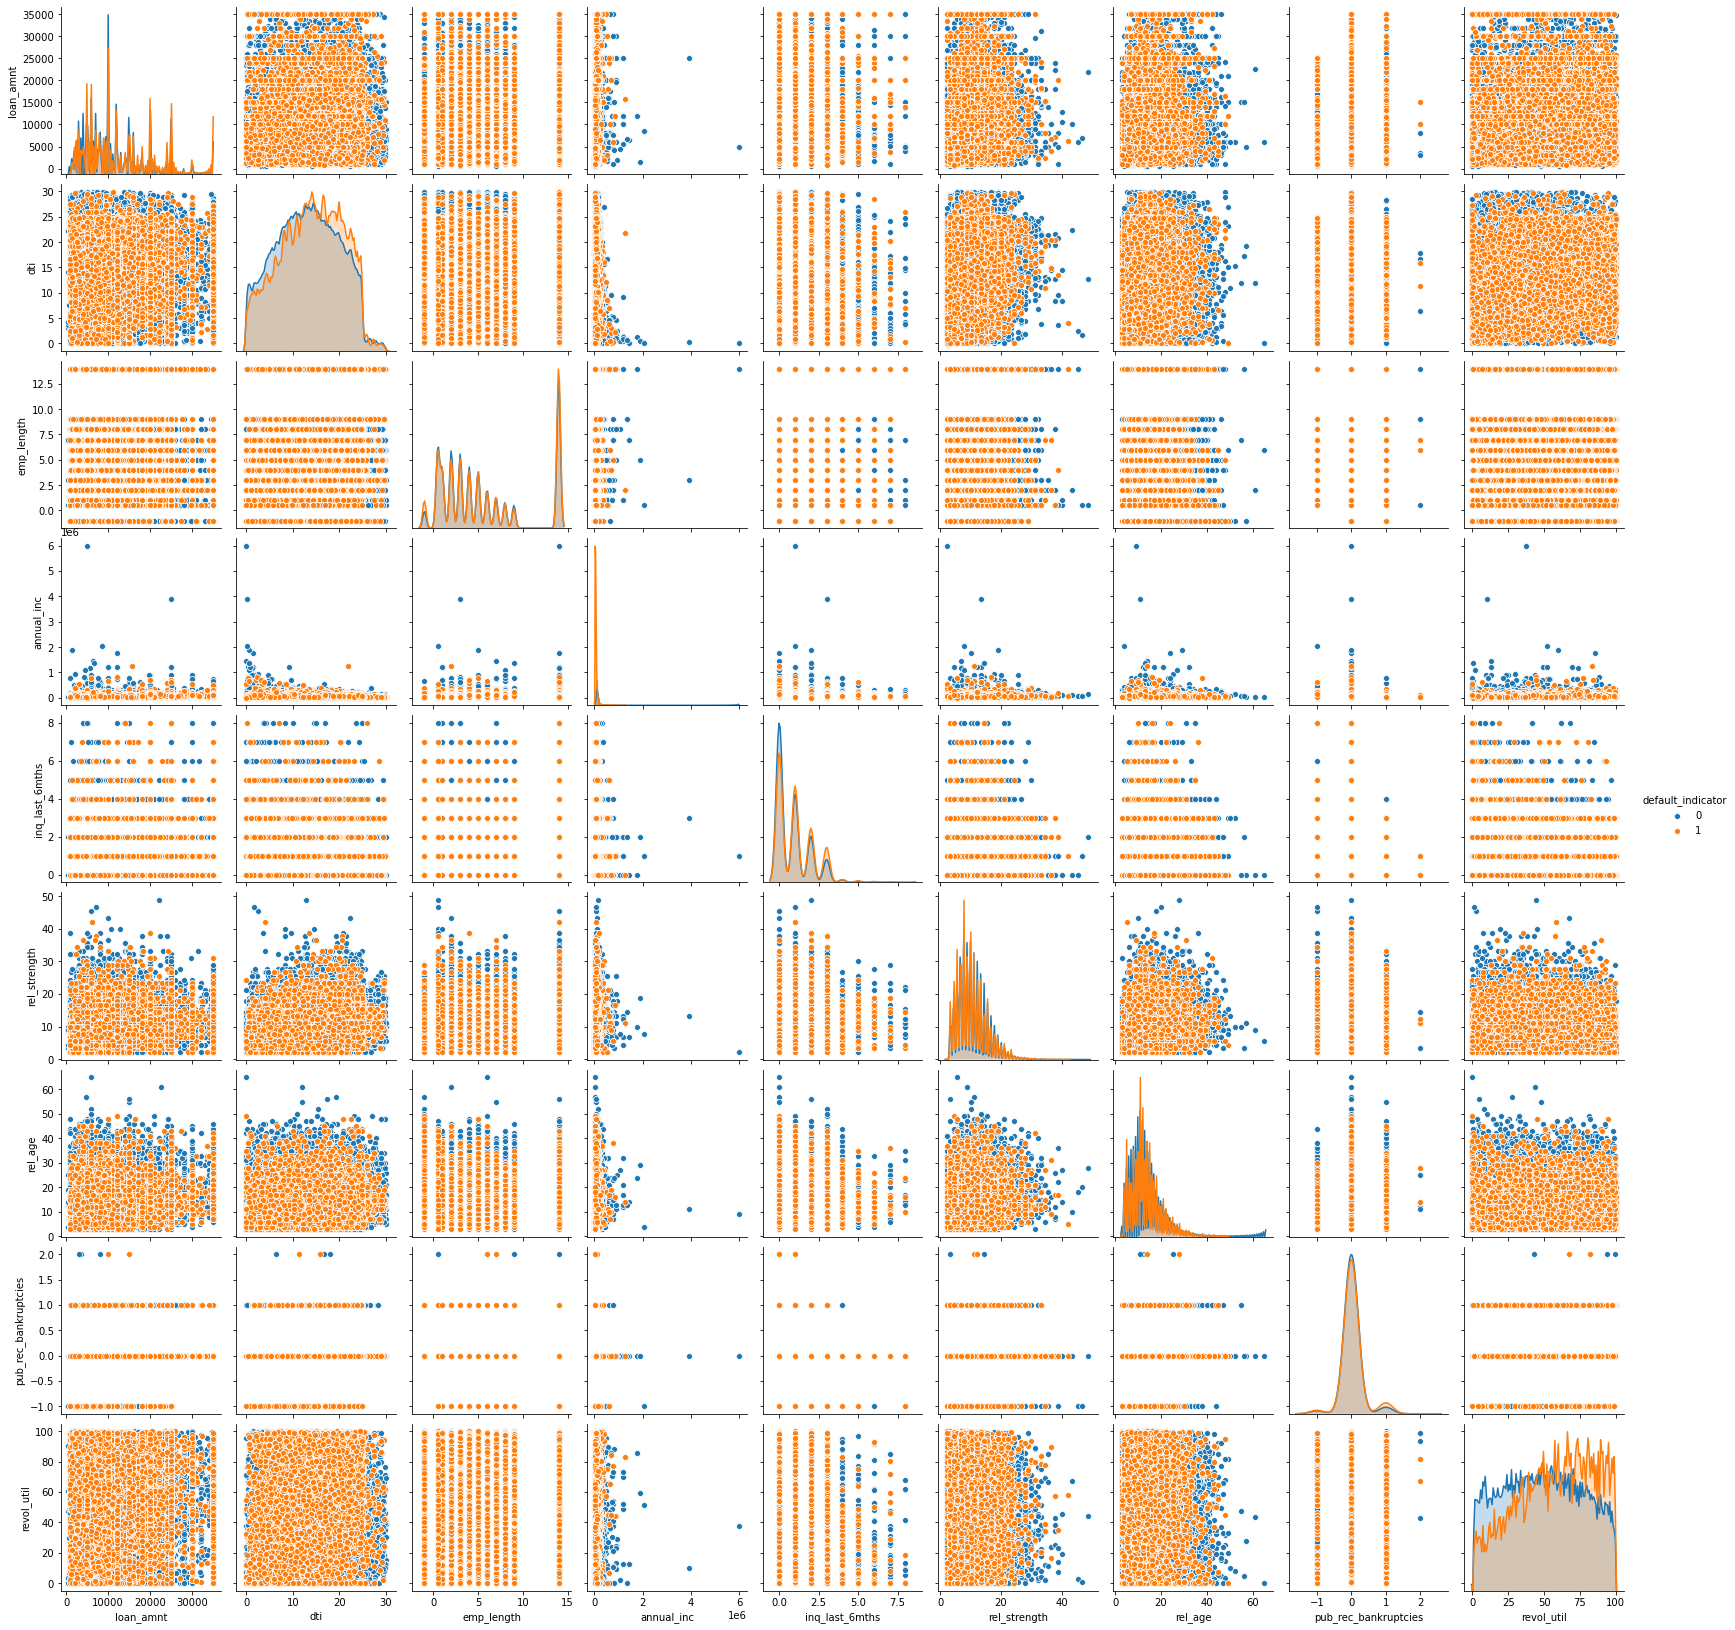

In [37]:
#Created the pairplot to analyse all numeric variable for bi-variate analysis
var_list = ['loan_amnt','dti','emp_length','annual_inc','inq_last_6mths','rel_strength','rel_age','pub_rec_bankruptcies','revol_util']
sns.pairplot(obligor1,vars = var_list, hue='default_indicator', diag_kws={'bw': 0.2})
plt.show()

In [38]:
#Function for getting for IV value for variables
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = dataset[feature].unique().to_list()[i]
        lst.append({
                    'Value':val,
                    'All': dataset[dataset[feature] == val].count()[feature],
                    'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
                    'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

In [39]:
#Calculating Information value for all categorical variables
cat_var_list = [var for var in obligor1.select_dtypes(['category']).columns.to_list() ]

for myvar in cat_var_list:
    df, iv = calculate_woe_iv(obligor1, myvar, 'default_indicator')
    print(myvar,'IV score: {:.2f}'.format(iv))


term IV score: 0.21
grade IV score: 0.34
sub_grade IV score: 0.37
home_ownership IV score: 0.00
verification_status IV score: 0.02
loan_status IV score: 0.00


C:\Users\azhar\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


purpose IV score: 0.07
emp_len_Miss_Ind IV score: 0.01
issue_yr IV score: 0.02
loan_amnt_bin IV score: 0.03
int_rate_bin IV score: 0.34
dti_bin IV score: 0.02
annual_inc_bin IV score: 0.04
rel_strength_bin IV score: 0.00
rel_age_bin IV score: 0.00
revol_util_bin IV score: 0.08
emp_length_bin IV score: 0.01
pub_rec_bankruptcies_bin IV score: 0.02
pub_rec_bin IV score: 0.02
inq_last_6mths_bin IV score: 0.04


### Calculating Information value for each variable will help us to identify the most statistically significant variables deriving the default rate without guess work

>> Information value orderwise for variables 
<br>
sub_grade - 0.37, term - 0.21, revol_util: 0.08, annual_inc: .04, inq_last_6mths: 0.04, loan_amnt: 0.03,addr_state: 0.03, dti: 0.02, pub_rec_bankruptcies: 0.02

In [40]:
obligor1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   term                      38577 non-null  category
 2   int_rate                  38577 non-null  float64 
 3   grade                     38577 non-null  category
 4   sub_grade                 38577 non-null  category
 5   emp_length                38577 non-null  float64 
 6   home_ownership            38577 non-null  category
 7   annual_inc                38577 non-null  float64 
 8   verification_status       38577 non-null  category
 9   loan_status               38577 non-null  category
 10  purpose                   38577 non-null  category
 11  addr_state                38577 non-null  object  
 12  dti                       38577 non-null  float64 
 13  inq_last_6mths            38577 non-null  int6

In [41]:
obligor1.term.unique()

[36 months, 60 months]
Categories (2, object): [36 months < 60 months]

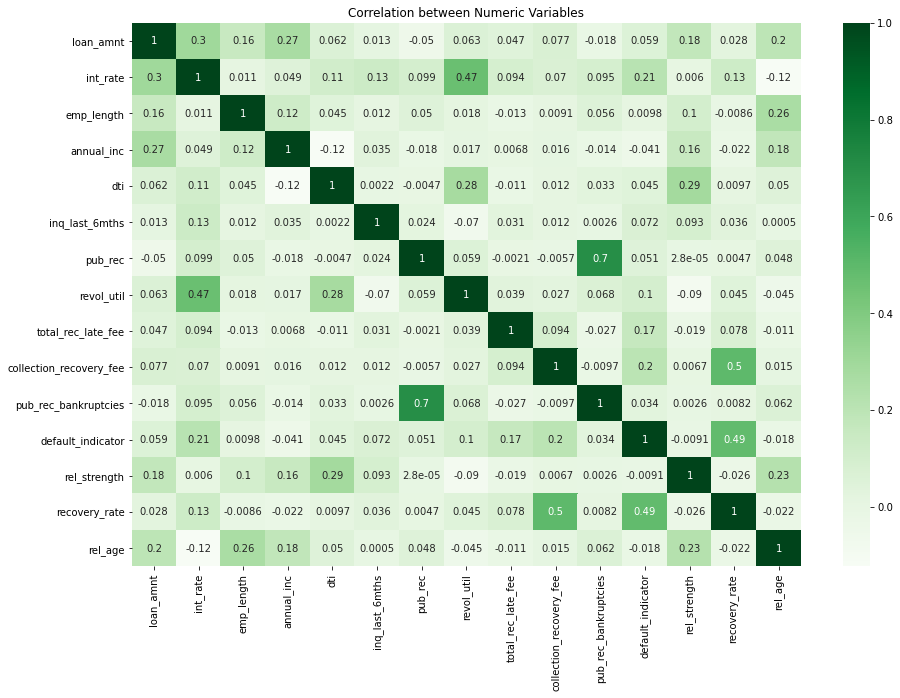

In [42]:
#Creating heatmap for numeric variable correlation 
plt.figure(figsize=(15,10))
plt.title('Correlation between Numeric Variables')
heatmap_df = obligor1.corr()
sns.heatmap(heatmap_df,cmap =  "Greens", annot=True)
plt.show()

### High correlation shown by bankruptcies public record and public record so we need to either create a combined variable to delete one of the two

In [43]:
obligor1.groupby('pub_rec_bin')['default_indicator'].agg(['count','mean'])

,count,mean
pub_rec_bin,,
No Record,36507,0.14
Record,2070,0.23


In [44]:
obligor1.groupby('pub_rec_bankruptcies_bin')['default_indicator'].agg(['count','mean'])

,count,mean
pub_rec_bankruptcies_bin,,
Missing,697,0.17
Never,36238,0.14
Once or Twice,1642,0.22


In [45]:
#Dropping public record bankruptcy variable as it is found to be already captured in public record which is further 
#registering other non bankruptcy records as well also there is high degree of correlation between these two variables
obligor1.drop(['pub_rec_bankruptcies','pub_rec_bankruptcies_bin'], axis=1, inplace=True)

In [46]:
obligor1.shape

(38577, 34)

## Bi-variable analysis of variable via suitable variable

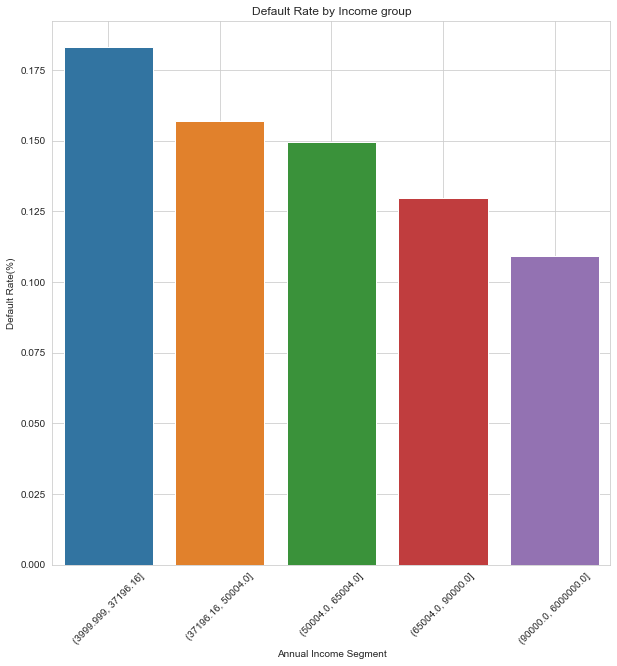

In [47]:
obligor_inc_def = obligor1.pivot_table(index='annual_inc_bin', values=['default_indicator'], aggfunc='mean')

def bar_plot(size, dataset, feature, title, xlabel, ylabel):
    sns.set_style('whitegrid')
#     sns.set_context('talk')
#     sns.set_palette('Paired',12)
#     sns.color_palette("Paired", 12)
    plt.figure(figsize=size)
    sns.barplot(x=dataset.index, y=feature, data=dataset)
    plt.xticks(rotation=45)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
bar_plot((10,10), obligor_inc_def, 'default_indicator', 'Default Rate by Income group', 'Annual Income Segment', 'Default Rate(%)' )




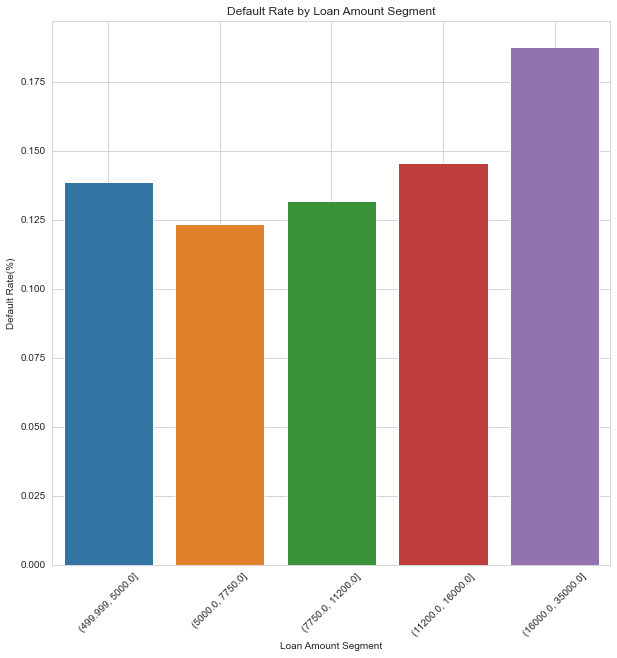

In [48]:
obligor_loan_amnt_def = obligor1.pivot_table(index='loan_amnt_bin', values=['default_indicator'], aggfunc='mean')
bar_plot((10,10), obligor_loan_amnt_def, 'default_indicator', 'Default Rate by Loan Amount Segment', 'Loan Amount Segment', 'Default Rate(%)' )

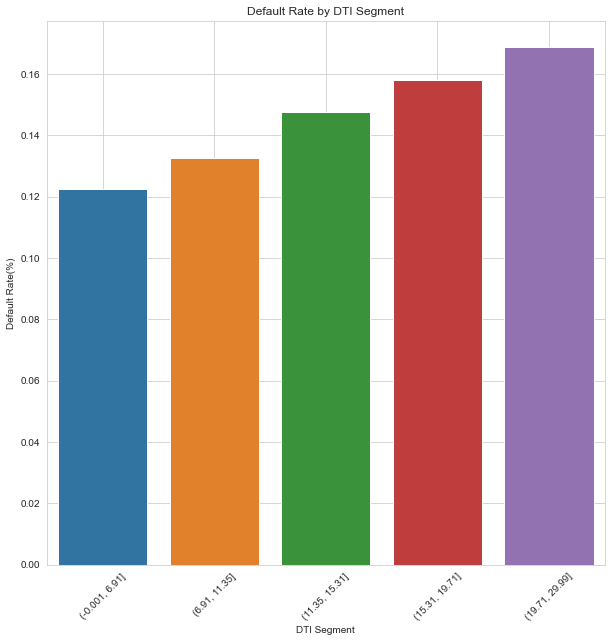

In [49]:
obligor_DTI_amnt_def = obligor1.pivot_table(index='dti_bin', values=['default_indicator'], aggfunc='mean')
bar_plot((10,10), obligor_DTI_amnt_def, 'default_indicator', 'Default Rate by DTI Segment', 'DTI Segment', 'Default Rate(%)' )

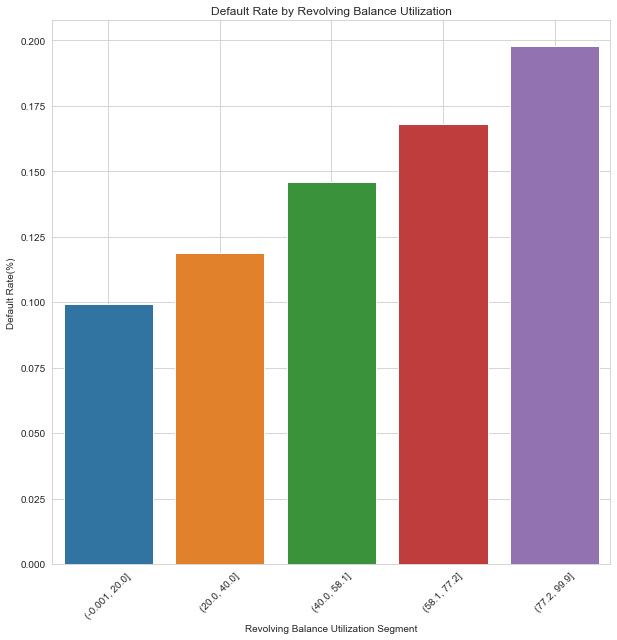

In [50]:

obligor_revol_bal_util_def = obligor1.pivot_table(index='revol_util_bin', values=['default_indicator'], aggfunc='mean')
bar_plot((10,10), obligor_revol_bal_util_def, 'default_indicator', 'Default Rate by Revolving Balance Utilization', 'Revolving Balance Utilization Segment', 'Default Rate(%)' )

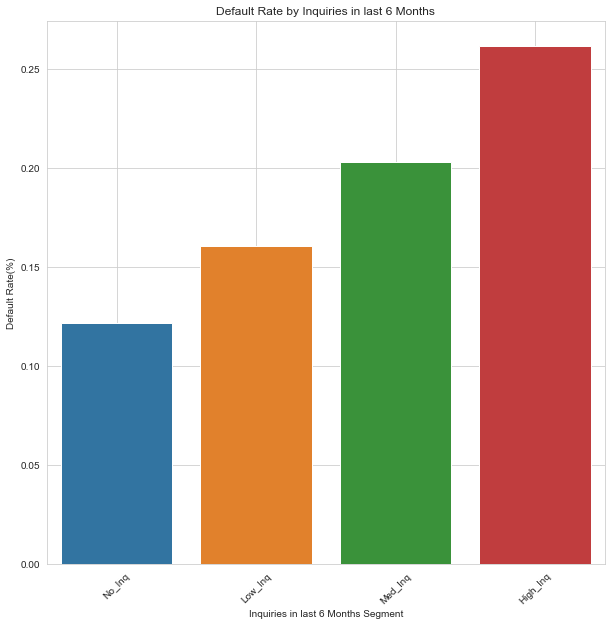

In [51]:
obligor_inq_cat_def = obligor1.pivot_table(index='inq_last_6mths_bin', values=['default_indicator'], aggfunc='mean')
bar_plot((10,10), obligor_inq_cat_def, 'default_indicator', 'Default Rate by Inquiries in last 6 Months', 'Inquiries in last 6 Months Segment', 'Default Rate(%)' )

In [52]:
obligor1.inq_last_6mths_bin.value_counts()

No_Inq      18709
Low_Inq     16314
Med_Inq      3443
High_Inq      111
Name: inq_last_6mths_bin, dtype: int64

In [53]:
obligor1.revol_util_bin.value_counts()

(-0.001, 20.0]    7760
(77.2, 99.9]      7709
(58.1, 77.2]      7706
(20.0, 40.0]      7705
(40.0, 58.1]      7697
Name: revol_util_bin, dtype: int64

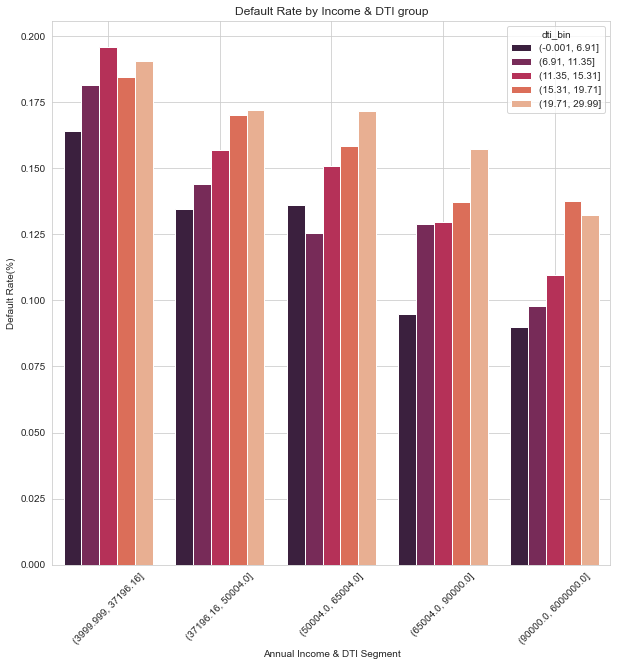

In [54]:
obligor_inc_dti_def = obligor1.pivot_table(index=['annual_inc_bin','dti_bin'], values=['default_indicator'], aggfunc='mean').reset_index()
obligor_inc_dti_def.head(10)

def bar_plot_dual(size, dataset,feature, target,hue, title, xlabel, ylabel,palette_color):
    sns.set_style('whitegrid')
    plt.figure(figsize=size)
    sns.barplot(x=feature, y=target,hue=hue, data=dataset,palette=palette_color)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
bar_plot_dual((10,10), obligor_inc_dti_def, 'annual_inc_bin','default_indicator','dti_bin', 'Default Rate by Income & DTI group', 'Annual Income & DTI Segment', 'Default Rate(%)' ,"rocket")

# sns.barplot(x='annual_inc_bin', y='default_indicator',hue='dti_bin', data=obligor1)
# plt.show()

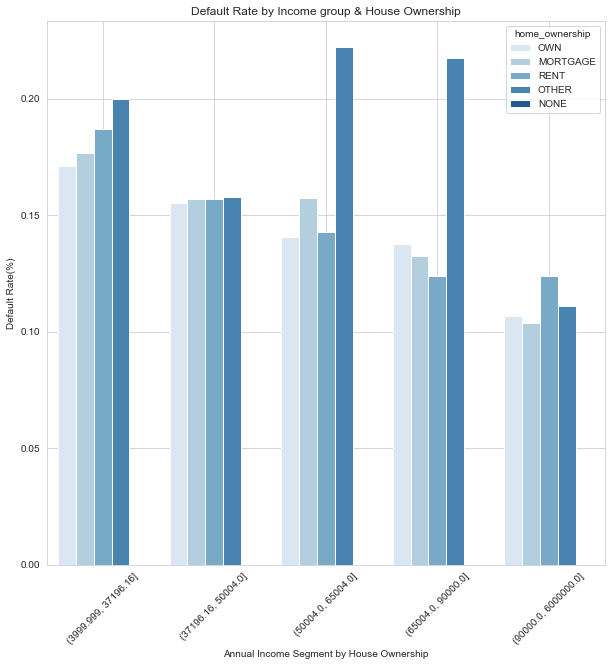

In [55]:
obligor_inc_house_def = obligor1.pivot_table(index=['annual_inc_bin','home_ownership'], values=['default_indicator'], aggfunc='mean').reset_index()
bar_plot_dual((10,10), obligor_inc_house_def, 'annual_inc_bin','default_indicator','home_ownership', 'Default Rate by Income group & House Ownership', 'Annual Income Segment by House Ownership', 'Default Rate(%)' ,"Blues")

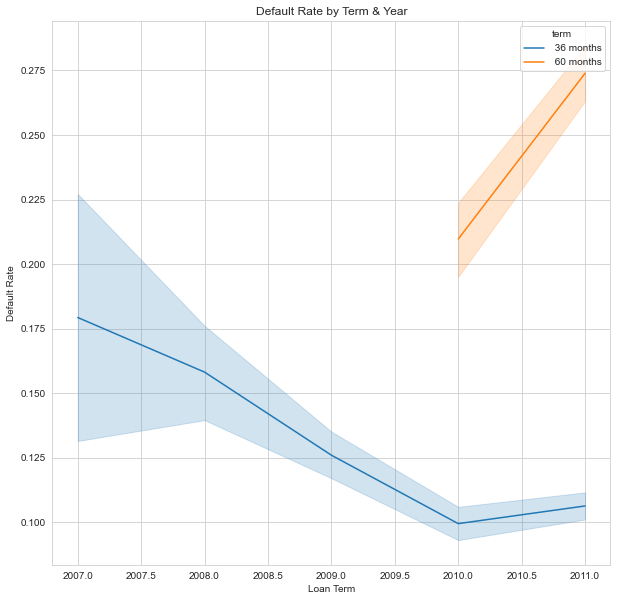

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(data=obligor1, x="issue_yr", y="default_indicator",hue='term', estimator='mean')
plt.title('Default Rate by Term & Year')
plt.xlabel('Loan Term')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()

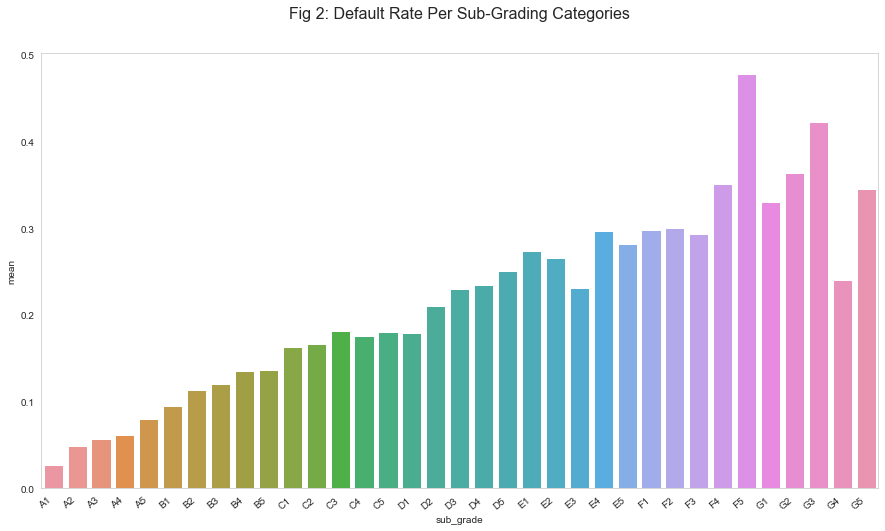

In [57]:
grade_stats = obligor1.groupby(['sub_grade'])['default_indicator'].describe()

# sns.set_style('whitegrid')

plt.figure(figsize=  (15,8))

grade_plot = sns.barplot(x=grade_stats.index, y='mean', data=grade_stats)
grade_plot.set_xticklabels(grade_plot.get_xticklabels(), rotation=40, ha="right")
grade_plot.grid(axis='y')
grade_plot.set_title('Fig 2: Default Rate Per Sub-Grading Categories',  pad=35, size=16)

plt.show()

In [58]:
obligor1['home_ownership'].replace('NONE','OTHER', inplace=True)
# asset_stats = obligor1[obligor1['default_indicator'] == 1].groupby(['home_ownership']).count()/obligor1[obligor1['default_indicator'] == 1].count()
# asset_stats = asset_stats['default_indicator']
asset_stats_1 = obligor1.groupby(['home_ownership'])['default_indicator'].agg(['count','mean'])
asset_stats_1
# plt.figure(figsize=  (15,8))
# plt.pie(asset_stats,labels = asset_stats.index, autopct='%1.1f%%', shadow=True,explode = (0.05,0.05,0.05,0.05))
# plt.show()

,count,mean
home_ownership,,
OWN,2975,0.15
MORTGAGE,17021,0.14
RENT,18480,0.15
OTHER,101,0.18


In [59]:
grade_int_stat = obligor1.groupby(['sub_grade'])[['int_rate','default_indicator']].agg(['mean']).reset_index()
grade_int_stat.columns = ['Sub_grade', 'Mean_Interest_Rate', 'Default_Rate']
grade_int_stat

,Sub_grade,Mean_Interest_Rate,Default_Rate
0,A1,5.81,0.03
1,A2,6.38,0.05
2,A3,7.16,0.06
3,A4,7.66,0.06
4,A5,8.26,0.08
5,B1,10.00,0.10
6,B2,10.49,0.11
7,B3,10.98,0.12
8,B4,11.39,0.14
9,B5,11.77,0.14


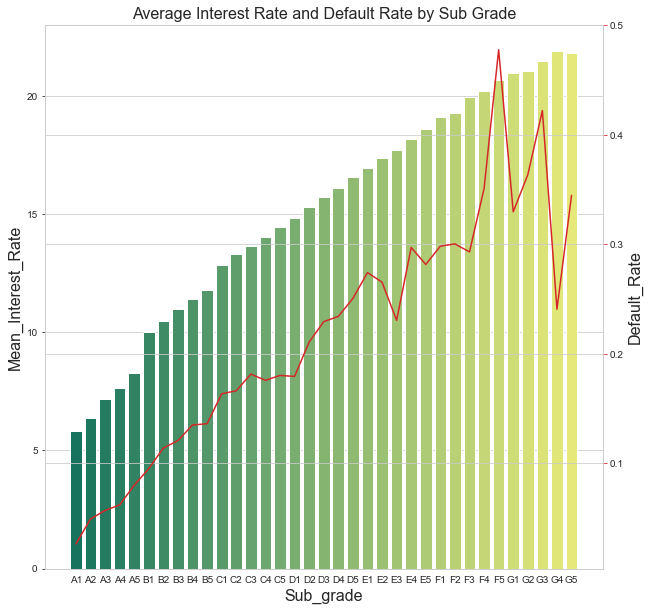

In [60]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Average Interest Rate and Default Rate by Sub Grade', fontsize=16)
ax1.set_xlabel('Sub Grade', fontsize=16)
ax1.set_ylabel('Mean Interest Rate', fontsize=16)
ax1 = sns.barplot(x='Sub_grade', y='Mean_Interest_Rate', data = grade_int_stat, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Default Rate %', fontsize=16)
ax2 = sns.lineplot(x='Sub_grade', y='Default_Rate', data = grade_int_stat, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [61]:

#grade_int_stat.columns = ['Sub_grade', 'Mean_Interest_Rate', 'Default_Rate']
# top5_36m=term_purpose_stat.sort_values(['term', 'mean'], ascending=[True,False]).head(5)
# top5_60m= term_purpose_stat.sort_values(['term', 'mean'], ascending=[False,False]).head(5)
# top5_terms=pd.concat([top5_36m,top5_60m])
# top5_terms

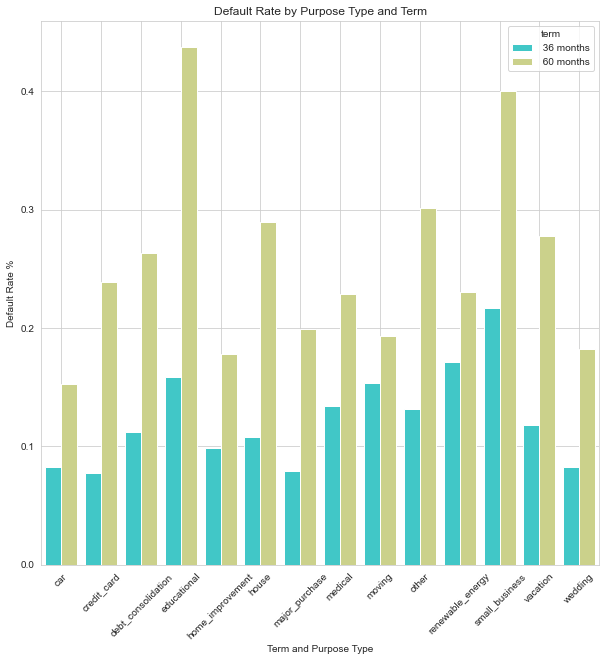

In [62]:
term_purpose_stat = obligor1.groupby(['term','purpose'])['default_indicator'].agg(['mean']).reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.barplot(x='purpose', y='mean',hue='term', data=term_purpose_stat,palette='rainbow')
plt.xticks(rotation=45)
plt.title('Default Rate by Purpose Type and Term')
plt.xlabel('Term and Purpose Type')
plt.ylabel('Default Rate %')
plt.grid(True)
plt.show()

# bar_plot_dual((10,10), term_purpose_stat, 'annual_inc_bin','default_indicator','dti_bin', 'Default Rate by Income & DTI group', 'Annual Income & DTI Segment', 'Default Rate(%)' ,"rainbow")


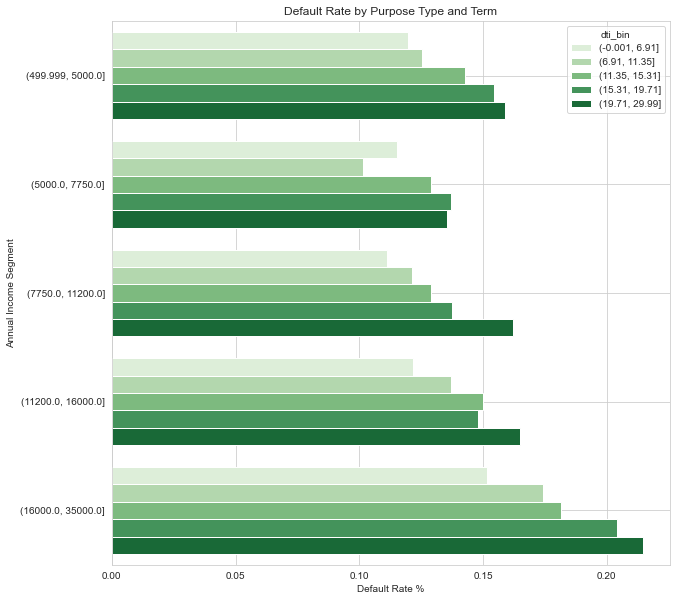

In [63]:
inc_term_stat = obligor1.groupby(['loan_amnt_bin','dti_bin'])['default_indicator'].agg(['mean']).reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.barplot(y='loan_amnt_bin', x='mean',hue='dti_bin', data=inc_term_stat,palette='Greens')
# plt.xticks(rotation=45)
plt.title('Default Rate by Purpose Type and Term')
plt.xlabel('Default Rate %')
plt.ylabel('Annual Income Segment')
plt.grid(True)
plt.show()

In [64]:
#obligor1.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index()
test = obligor1.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index().sort_values(['loan_amnt_bin','purpose'],ascending=[False, True])

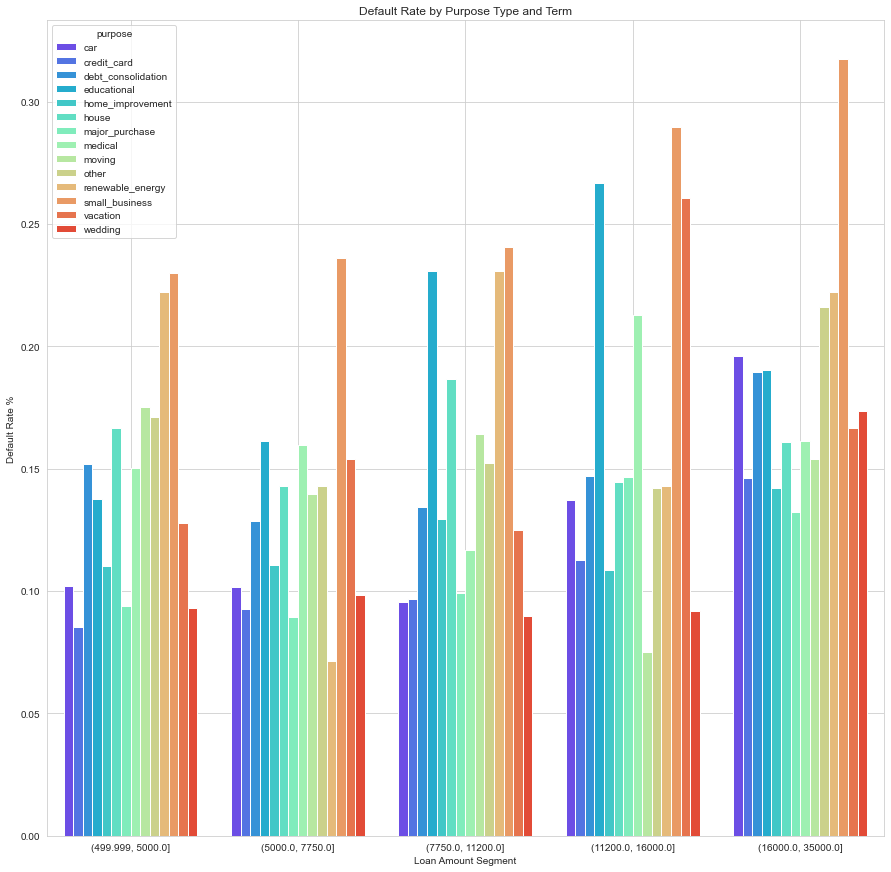

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15))
sns.barplot(x='loan_amnt_bin', y='mean',hue='purpose', data=test,palette='rainbow')
# plt.xticks(rotation=45)
plt.title('Default Rate by Purpose Type and Term')
plt.ylabel('Default Rate %')
plt.xlabel('Loan Amount Segment')
plt.grid(True)
plt.show()

In [66]:
df_bin_1 = obligor1[(obligor1.loan_amnt >= 499.999) & (obligor1.loan_amnt <=5000.0) ]
df_bin_2 = obligor1[(obligor1.loan_amnt > 5000.0) & (obligor1.loan_amnt <=7750.0) ]
df_bin_3 = obligor1[(obligor1.loan_amnt > 7750.0) & (obligor1.loan_amnt <=11200.0) ]
df_bin_4 = obligor1[(obligor1.loan_amnt > 11200.0) & (obligor1.loan_amnt <=16000.0) ]
df_bin_5 = obligor1[(obligor1.loan_amnt > 16000.0) & (obligor1.loan_amnt <=35000.0) ]

loanb1_top10_pur = df_bin_1.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index().sort_values(['count'], ascending=False).head(10)
loanb2_top10_pur = df_bin_2.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index().sort_values(['count'], ascending=False).head(10)
loanb3_top10_pur = df_bin_3.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index().sort_values(['count'], ascending=False).head(10)
loanb4_top10_pur = df_bin_4.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index().sort_values(['count'], ascending=False).head(10)
loanb5_top10_pur = df_bin_5.groupby(['loan_amnt_bin','purpose'])['default_indicator'].agg(['count','mean']).reset_index().sort_values(['count'], ascending=False).head(10)

loanb_top10_pur_count = pd.concat([loanb1_top10_pur,loanb2_top10_pur,loanb3_top10_pur,loanb4_top10_pur,loanb5_top10_pur])

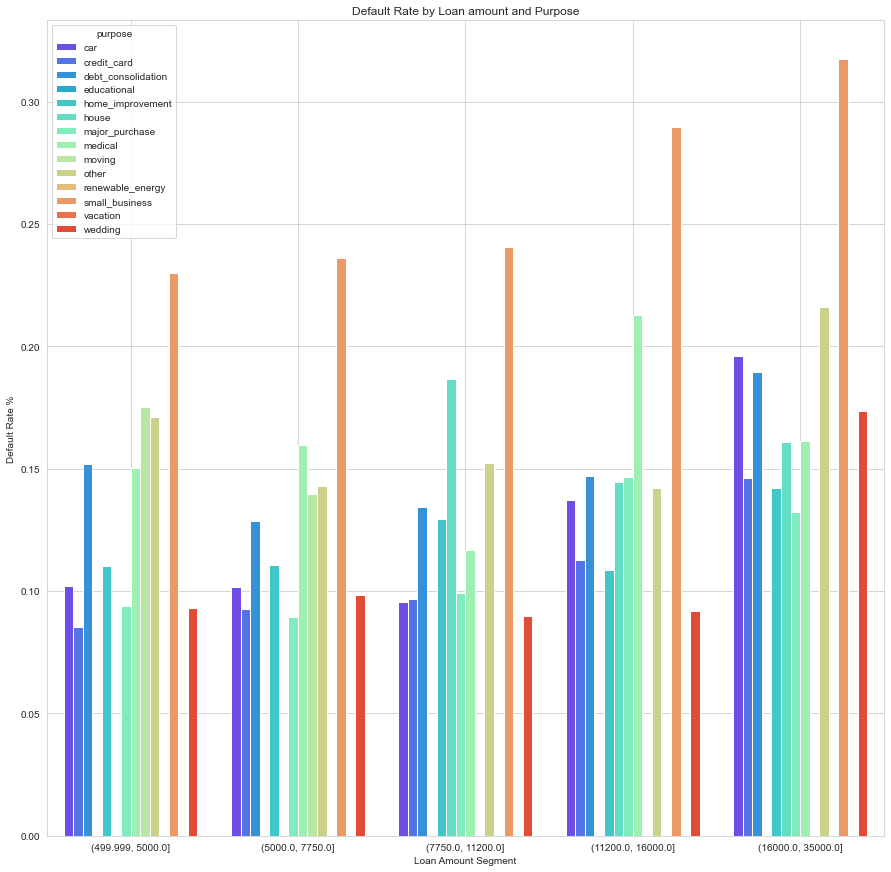

In [67]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15))
sns.barplot(x='loan_amnt_bin', y='mean',hue='purpose', data=loanb_top10_pur_count,palette='rainbow')
# plt.xticks(rotation=45)
plt.title('Default Rate by Loan amount and Purpose')
plt.ylabel('Default Rate %')
plt.xlabel('Loan Amount Segment')
plt.grid(True)
plt.show()

In [68]:
#Preparing Data for pie chart of Inquiry in last 6 months
inq_rev_util_df = obligor1.groupby(['revol_util_bin','inq_last_6mths_bin'])['default_indicator'].agg(['count','mean']).reset_index()

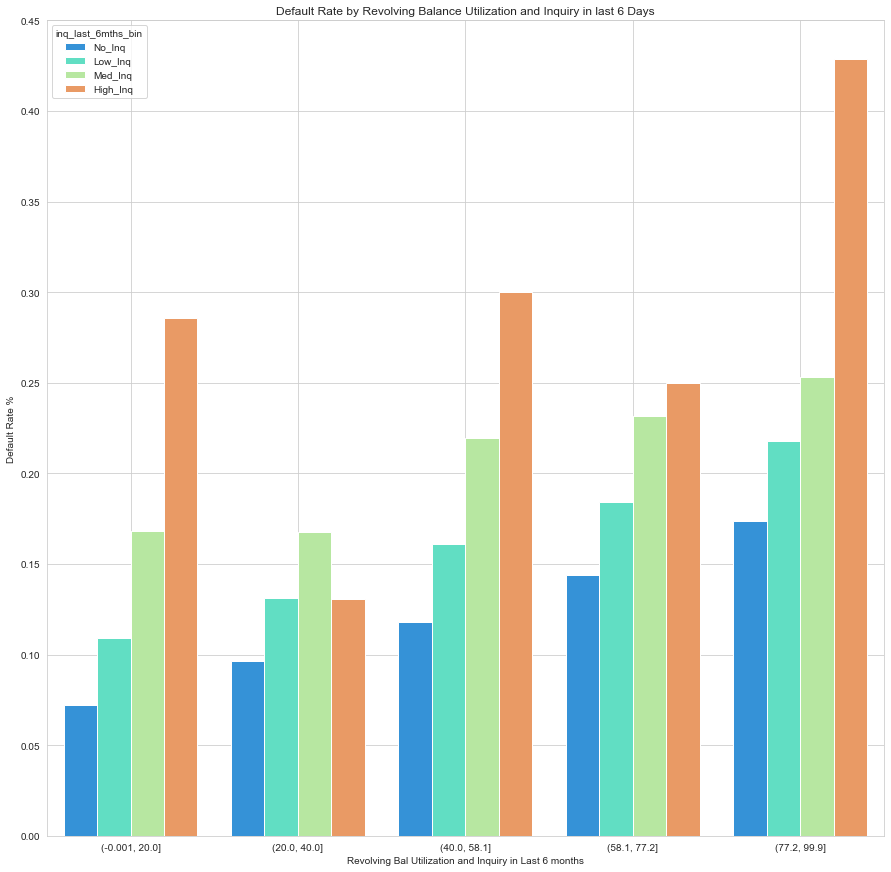

In [69]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15))
sns.barplot(x='revol_util_bin', y='mean',hue='inq_last_6mths_bin', data=inq_rev_util_df,palette='rainbow')
# plt.xticks(rotation=45)
plt.title('Default Rate by Revolving Balance Utilization and Inquiry in last 6 Days')
plt.ylabel('Default Rate %')
plt.xlabel('Revolving Bal Utilization and Inquiry in Last 6 months')
plt.grid(True)
plt.show()

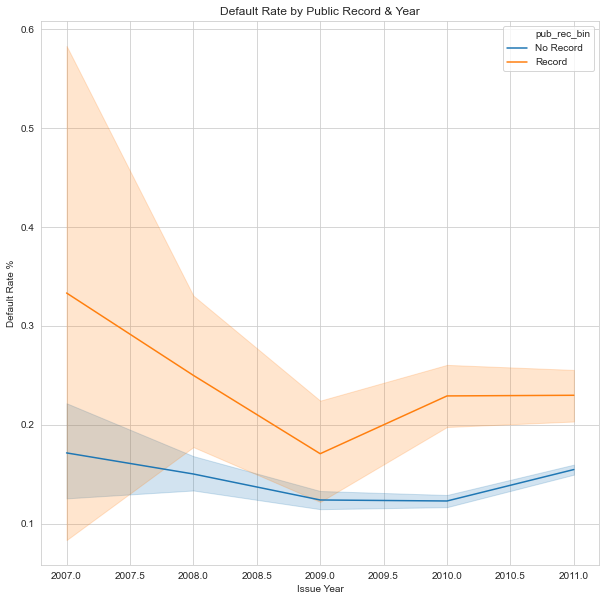

In [70]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(data=obligor1, x="issue_yr", y="default_indicator",hue='pub_rec_bin', estimator='mean')
plt.title('Default Rate by Public Record & Year')
plt.xlabel('Issue Year')
plt.ylabel('Default Rate %')
plt.grid(True)
plt.show()

In [71]:
resi_driven_default = obligor1.groupby(['home_ownership','addr_state'])['default_indicator'].agg(['count','mean']).reset_index()
resi_driven_default['home_ownership'].replace('NONE','OTHER', inplace=True)
resi_driven_default.columns = ['Home_Ownership_Status','Resi_Address_State','Total_Credits','Default_Rate%']
resi_driven_default = resi_driven_default[(resi_driven_default['Total_Credits'] > 400) & (resi_driven_default['Default_Rate%'] > 0.14)] 
resi_driven_default

,Home_Ownership_Status,Resi_Address_State,Total_Credits,Default_Rate%
54,MORTGAGE,CA,2193,0.15
59,MORTGAGE,FL,1303,0.17
60,MORTGAGE,GA,819,0.15
70,MORTGAGE,MD,483,0.14
72,MORTGAGE,MI,435,0.15
74,MORTGAGE,MO,416,0.14
80,MORTGAGE,NJ,613,0.14
104,RENT,CA,4338,0.17
109,RENT,FL,1221,0.18
110,RENT,GA,436,0.17


Text(0.5, 1.0, 'Fig 2: Default Rate Per State By Home Ownership Status')

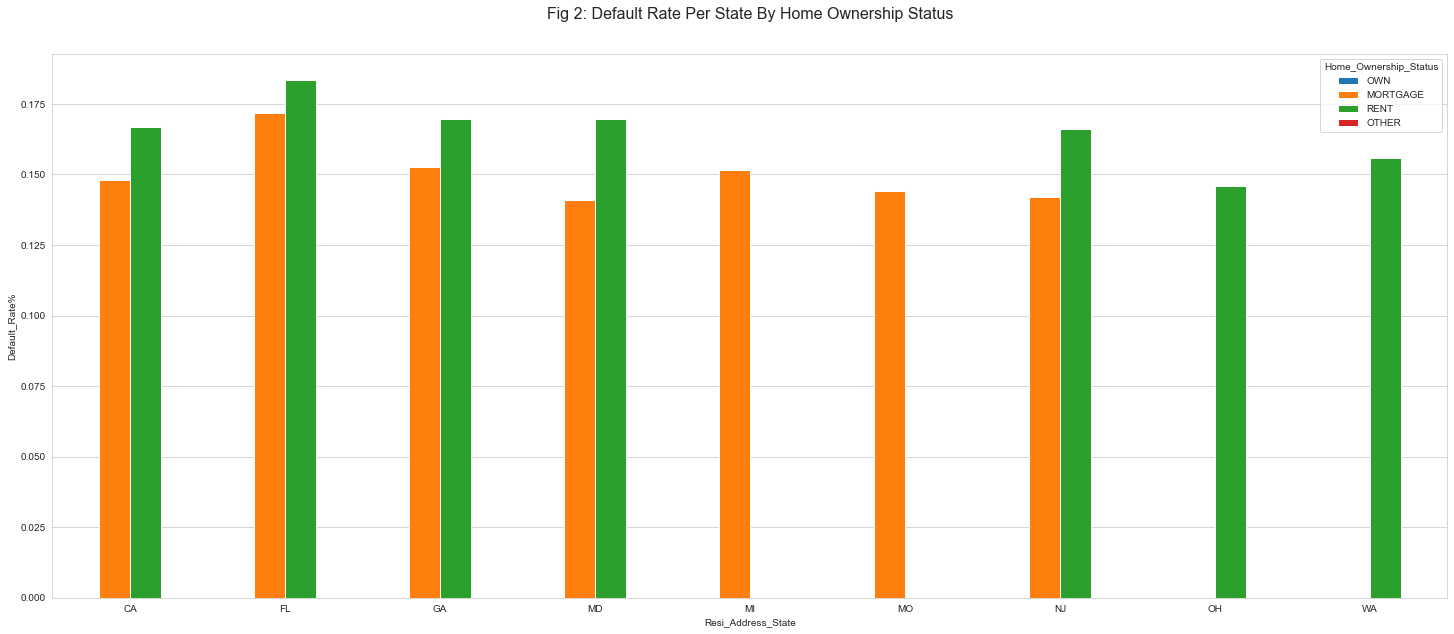

In [72]:
sns.set_style('whitegrid')
plt.figure(figsize=  (25,10))
ax = sns.barplot(
    data=resi_driven_default,
    x='Resi_Address_State',
    y='Default_Rate%',
    hue='Home_Ownership_Status',
    saturation=1,
    )

ax.set_title('Fig 2: Default Rate Per State By Home Ownership Status',  pad=35, size=16)

In [73]:
product_process_driven_default = obligor1.groupby(['purpose','verification_status'])['default_indicator'].agg(['count','sum']).reset_index()
product_process_driven_default.columns = ['Product','Verification_Process','Total_Credits','Total_Defaults']
product_process_driven_default = product_process_driven_default[(product_process_driven_default['Total_Credits'] > 200)] 
product_process_driven_default

,Product,Verification_Process,Total_Credits,Total_Defaults
0,car,Source Verified,443,51
1,car,Verified,265,41
2,car,Not Verified,791,68
3,credit_card,Source Verified,1181,137
4,credit_card,Verified,1601,203
5,credit_card,Not Verified,2245,202
6,debt_consolidation,Source Verified,4453,684
7,debt_consolidation,Verified,6380,1142
8,debt_consolidation,Not Verified,7222,941
11,educational,Not Verified,230,39


In [74]:
product_credits = product_process_driven_default.groupby(['Product'])[['Total_Credits']].sum().reset_index()
product_credits.rename(columns={'Total_Credits':'SumTotal_Credits'},  inplace=True)
product_credits
prod_verf_driven_default = pd.merge(product_process_driven_default,
    product_credits,
    how='inner',
    on='Product')
prod_verf_driven_default
prod_verf_driven_default['def%_prod_verf'] = prod_verf_driven_default['Total_Defaults']/prod_verf_driven_default['SumTotal_Credits']


prod_verf_driven_def = prod_verf_driven_default.drop(['Total_Credits','Total_Defaults','SumTotal_Credits'],axis=1)
prod_verf_def = prod_verf_driven_def.pivot_table(index='Product',columns='Verification_Process',values='def%_prod_verf')

<Figure size 720x720 with 0 Axes>

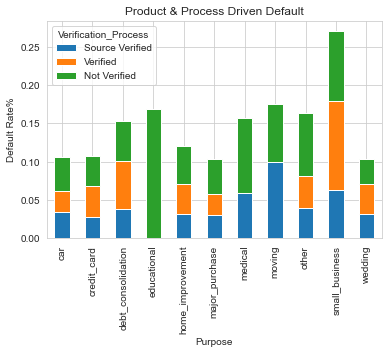

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
prod_verf_def.plot(kind="bar", stacked=True)
plt.title("Product & Process Driven Default")
plt.xlabel('Purpose')
plt.ylabel('Default Rate%')
plt.show()